In [1]:
# warning message 안 보이게

# import warnings
# warnings.simplefilter(action='ignore', category=FutureWarning)

In [2]:
# library import
import pandas as pd
import numpy as np
from plotnine import *
# 여기서 *는 total, 즉 '모든 것'을 의미한다

In [3]:
%matplotlib inline
# Jupyter Notebook에서 Matplotlib를 쓰려면 이 말을 써야 한다. 데이터시각화 
# 그래프가 노트북 안에 보이게 하기 위한 것

In [4]:
df = pd.read_csv('data/seoul_bike/서울특별시 공공자전거 대여이력 정보_2018년_2분기_4.csv', 
                 encoding='cp949', engine='python')

# cp949 형식으로 인코딩을 한다
# engine = 'python'을 붙인 이유는 한글 이름 파일을 읽기 위해서다

# 처음에 df에 csv를 불러오라고 정의를 했으므로 df. ~~~ 이런식으로 코딩을 한다!
df.shape

# (a, b) : a행 b열 모양이 이렇다~

(586304, 11)

In [5]:
# 위
df.head()

,'자전거번호','대여일시','대여대여소번호','대여대여소명','대여거치대','반납일시','반납대여소번호','반납대여소명','반납거치대','이용시간(분)','이용거리(M)'
0,'SPB-11906','2018-06-16 00:00:07','932',' 예일여중',1,'2018-06-16 00:16:41','934',' 신사동 성당',11,15,2160
1,'SPB-16954','2018-06-16 00:00:07','272',' 당산육갑문',16,'2018-06-16 02:00:36','1827',' 독산보도육교 앞 자전거 보관소',9,120,18100
2,'SPB-09676','2018-06-16 00:00:11','1036',' 고덕동 주양쇼핑',7,'2018-06-16 00:24:05','1038',' 강일 다솜 어린이 공원',9,23,3350
3,'SPB-07143','2018-06-16 00:00:15','1726',' 삼익세라믹아파트교차로',7,'2018-06-16 00:15:31','1706',' 기업은행 앞',9,14,1480
4,'SPB-13007','2018-06-16 00:00:16','2058',' 노량진동 맥도널드앞',10,'2018-06-16 00:14:25','258',' 신길역3번출구',8,13,2920


In [6]:
# 아래
df.tail()

,'자전거번호','대여일시','대여대여소번호','대여대여소명','대여거치대','반납일시','반납대여소번호','반납대여소명','반납거치대','이용시간(분)','이용거리(M)'
586299,'SPB-15985','2018-06-30 23:59:55','505',' 자양사거리 광진아크로텔 앞',9,'2018-07-01 00:09:38','593','자양중앙나들목',5,9,1230
586300,'SPB-15081','2018-06-30 23:59:55','1328',' 월곡역 3번출구',7,'2018-07-01 00:18:02','647',' 신이문역 1번출구',7,17,3600
586301,'SPB-13677','2018-06-30 23:59:57','2376',' 수서역 6번출구 앞',2,'2018-07-01 00:20:38','2387',' 래미안강남힐즈 사거리',5,20,2590
586302,'SPB-06577','2018-06-30 23:59:57','1251',' 석촌역 2번출구',2,'2018-07-01 00:57:29','1245',' 문정 법조단지9',4,57,6640
586303,'SPB-03842','2018-06-30 23:59:58','2169',' 봉천역 2번출구',6,'2018-07-01 00:08:05','2112',' 서울대입구역 마에스트로',7,7,910


In [7]:
df.info() # 정보를 알려줘!

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 586304 entries, 0 to 586303
Data columns (total 11 columns):
'자전거번호'      586304 non-null object
'대여일시'       586304 non-null object
'대여대여소번호'    586304 non-null object
'대여대여소명'     586304 non-null object
'대여거치대'      586304 non-null int64
'반납일시'       586304 non-null object
'반납대여소번호'    586304 non-null object
'반납대여소명'     586304 non-null object
'반납거치대'      586304 non-null int64
'이용시간(분)'    586304 non-null int64
'이용거리(M)'    586304 non-null int64
dtypes: int64(4), object(7)
memory usage: 49.2+ MB


In [8]:
df.describe()
# 처음 descirbe - 숫자형에 대해서 실행한다!

# R에서 summary랑 똑같네!
# count 개수, mean 평균, std 표준편차, min 최솟값, 25% 제1분위, 50% 제2분위, 75% 제3분위, max 최댓값 제4분위 

,'대여거치대','반납거치대','이용시간(분)','이용거리(M)'
count,586304.000000,586304.000000,586304.000000,586304.000000
mean,6.981460,6.939248,28.922530,4712.563602
std,5.217671,5.196975,30.866556,9003.052657
min,1.000000,1.000000,2.000000,0.000000
25%,3.000000,3.000000,9.000000,1320.000000
50%,6.000000,6.000000,18.000000,2530.000000
75%,10.000000,10.000000,40.000000,5290.000000
max,40.000000,40.000000,4320.000000,255070.000000


In [9]:
df.describe(include=np.object)
# 숫자 타입 이외에도 object에 대해서도 이야기해준다

,'자전거번호','대여일시','대여대여소번호','대여대여소명','반납일시','반납대여소번호','반납대여소명'
count,586304,586304,586304,586304,586304,586304,586304
unique,12970,426750,1267,1267,427833,1269,1269
top,'SPB-18238','2018-06-18 18:56:44','207',' 여의나루역 1번출구 앞','2018-06-19 19:53:32','113',' 홍대입구역 2번출구 앞'
freq,139,42,4073,4073,18,3896,3896


### 코드 해석
##### count : Data가 얼마나 있는가
##### unique : Data가 있는것중에 독창적인게 얼마나 있는가 (즉, 중복되지 않고 해당 원소 딱 하나만 있는 것이 얼마나 있는가)
##### top : 가장 많이 있는 Data가 무엇인가
##### freq : 가장 많이 있는 Data 얘는 몇개가 있는가?

In [10]:
# column에 있는 ' 를 없애보자구나!

df.columns = df.columns.str.strip("'")

# str : 문자형 처리를 한다
# strip : 없애는 것이다 ("''")이므로 '를 없앤다는 것을 알 수 있다.
# rstrip : 오른쪽 빈칸 없애기, lstrip : 왼쪽 빈칸 없애기

In [11]:
# coulmn에 ' 가 없어졌다는 것을 확인할 수 있어요!
df.head(2)

,자전거번호,대여일시,대여대여소번호,대여대여소명,대여거치대,반납일시,반납대여소번호,반납대여소명,반납거치대,이용시간(분),이용거리(M)
0,'SPB-11906','2018-06-16 00:00:07','932',' 예일여중',1,'2018-06-16 00:16:41','934',' 신사동 성당',11,15,2160
1,'SPB-16954','2018-06-16 00:00:07','272',' 당산육갑문',16,'2018-06-16 02:00:36','1827',' 독산보도육교 앞 자전거 보관소',9,120,18100


In [12]:
# data에 있는 ' 를 제거해보자!

df = df.apply(lambda x: x.str.strip("'") 
              if x.dtype == np.dtype('object')
             else x)

# x의 데이터 타입이 object인 경우 x를 str 문자열로 처리한 다음 거기서 ' 를 없애라
# 만약 데이터 타입이 object가 아니라면 그냥 x 놓아라

In [13]:
# data에 있는 ' 를 제거한걸 확인할 수 있다!
df.head(2)

,자전거번호,대여일시,대여대여소번호,대여대여소명,대여거치대,반납일시,반납대여소번호,반납대여소명,반납거치대,이용시간(분),이용거리(M)
0,SPB-11906,2018-06-16 00:00:07,932,예일여중,1,2018-06-16 00:16:41,934,신사동 성당,11,15,2160
1,SPB-16954,2018-06-16 00:00:07,272,당산육갑문,16,2018-06-16 02:00:36,1827,독산보도육교 앞 자전거 보관소,9,120,18100


In [14]:
# 결측치 NULL Data가 있는지 확인하기

df.isnull().sum()

# NULL Data가 있는지 확인하고 만약 NULL Data가 있다면 그 개수를 합해라 (sum)

자전거번호      0
대여일시       0
대여대여소번호    0
대여대여소명     0
대여거치대      0
반납일시       0
반납대여소번호    0
반납대여소명     0
반납거치대      0
이용시간(분)    0
이용거리(M)    0
dtype: int64

In [15]:
df.columns

# columns 열을 프린트해라

Index(['자전거번호', '대여일시', '대여대여소번호', '대여대여소명', '대여거치대', '반납일시', '반납대여소번호',
       '반납대여소명', '반납거치대', '이용시간(분)', '이용거리(M)'],
      dtype='object')

In [16]:
# 대여량이 많은 상위 대여소명 출력

df['대여대여소명'].value_counts()
# 많은 순서대로 출력됨

# value_counts() : 기본 default 설정이 오름차순이다!

 여의나루역 1번출구 앞               4073
 뚝섬유원지역 1번출구 앞              3369
 홍대입구역 2번출구 앞               3174
 봉림교 교통섬                    2709
 롯데월드타워(잠실역2번출구 쪽)          2637
 고속터미널역 8-1번, 8-2번 출구 사이    2453
 마포구민체육센터 앞                 2178
 신도림역 1번 출구 앞               2022
 안암로터리 버스정류장 앞              1987
 잠실새내역 5번 출구 뒤              1841
 건국대학교 (입학정보관)              1810
 IFC몰                       1721
 광진구의회 앞                    1610
 CJ 드림시티                    1586
 몽촌토성역 1번출구 옆               1585
 오목교역 7번출구 앞                1585
 합정역 7번출구 앞                 1547
 당산역 10번출구 앞                1540
 옥수역 3번출구                   1527
 하늘채코오롱아파트 건너편              1524
 방이삼거리                      1496
 신용산역 6번출구 앞                1483
 마포구청 앞                     1466
 구로디지털단지역 앞                 1447
 당산육갑문                      1401
 가양역 8번출구                   1378
 여의도역 1번출구 옆                1374
 양천향교역 7번출구앞                1357
 자양사거리 광진아크로텔 앞             1357
 청계천 생태교실 앞                 1355
          

In [17]:
# 대여량이 많은 상위 대여소명 출력 TOP 10
df['대여대여소명'].value_counts().head(10)

 여의나루역 1번출구 앞               4073
 뚝섬유원지역 1번출구 앞              3369
 홍대입구역 2번출구 앞               3174
 봉림교 교통섬                    2709
 롯데월드타워(잠실역2번출구 쪽)          2637
 고속터미널역 8-1번, 8-2번 출구 사이    2453
 마포구민체육센터 앞                 2178
 신도림역 1번 출구 앞               2022
 안암로터리 버스정류장 앞              1987
 잠실새내역 5번 출구 뒤              1841
Name: 대여대여소명, dtype: int64

In [18]:
# 반납량이 많은 상위 대여소명 출력 TOP 10
df['반납대여소명'].value_counts().head(10)

 홍대입구역 2번출구 앞               3896
 뚝섬유원지역 1번출구 앞              3814
 여의나루역 1번출구 앞               3730
 봉림교 교통섬                    2762
 롯데월드타워(잠실역2번출구 쪽)          2624
 고속터미널역 8-1번, 8-2번 출구 사이    2495
 마포구민체육센터 앞                 2454
 안암로터리 버스정류장 앞              2110
 신도림역 1번 출구 앞               1961
 CJ 드림시티                    1932
Name: 반납대여소명, dtype: int64

In [19]:
# 평균 이용거리가 긴 상위 대여소 출력
# 대여대여소명별 이용거리의 평균을 구하기

df.groupby('대여대여소명')['이용거리(M)'].mean().reset_index().sort_values(by='이용거리(M)', ascending=False).head()
# .reset_index() 이 말이 있으면 Series에서 DataFrame으로 보여주는 형식이 바뀐다!
# 뭐랄까 좀 더 깔끔하게 된거랄까

# ascending = False : 오름차순으로 해라!

,대여대여소명,이용거리(M)
353,동작역 5번출구 동작주차공원,10454.240000
330,독산보도육교 앞 자전거 보관소,10401.840607
810,신한은행 시흥대로금융센터지점,9857.738095
280,달맞이공원,9639.504950
1166,한내근린공원 남측,9419.090909


In [20]:
# 평균 이용거리가 짧은 상위 대여소 출력
# 대여대여소명별 이용거리의 평균을 구하기 

df.groupby('대여대여소명')['이용거리(M)'].mean().reset_index().sort_values(by='이용거리(M)', ascending=True).head(10)

# ascending = True : 내림차순으로 해라!

,대여대여소명,이용거리(M)
1249,상암센터 정비실,256.250000
188,국군복지단,1828.244275
7,CJ오쇼핑앞,1832.727273
100,건국대학교 과학관(이과대) 앞,2143.065327
937,원남동사거리,2234.752294
584,상림마을 생태공원,2405.736041
700,성북제일새마을금고 본점 앞,2416.977778
40,SK telecom(수유직영점) 앞,2496.626506
939,원묵고등학교,2563.861111
641,서울보증보험본사 앞,2588.011928


In [21]:
# 평균 이용시간이 많은 상위 대여소

df.groupby('대여대여소명')['이용시간(분)'].mean().reset_index().sort_values(by='이용시간(분)', ascending=False).head(10)

,대여대여소명,이용시간(분)
280,달맞이공원,59.782178
353,동작역 5번출구 동작주차공원,59.484000
93,개화동상사마을종점 버스정류장,55.500000
649,서울숲 남문 버스정류소 옆,55.495074
648,서울숲 관리사무소,55.492228
1231,흑석역 1번출구,53.950631
1194,현대고등학교 건너편,53.633184
1172,한신16차아파트 119동 앞,53.196926
419,망원초록길 입구,52.245098
118,"고속터미널역 8-1번, 8-2번 출구 사이",51.832858


In [22]:
# 평균 이용시간이 적은 상위 대여소

df.groupby('대여대여소명')['이용시간(분)'].mean().reset_index().sort_values(by='이용시간(분)', ascending=True).head(10)

,대여대여소명,이용시간(분)
7,CJ오쇼핑앞,11.416667
1249,상암센터 정비실,12.000000
188,국군복지단,12.022901
1089,참새공원(백곡경노당),12.666667
575,삼일초등학교 인근,14.460274
656,서울시립대 앞,14.618026
1265,청계산입구역 1번출구,15.210332
331,독산역 1번출구 앞 자전거보관소,15.482249
267,녹번역 4번출구,15.557500
1028,정동사거리,15.994643


In [23]:
# 대여일시, 반납일시 coulmn의 type을 datetime 타입으로 바꾸기!

df['대여일시'] = pd.to_datetime(df['대여일시'])
df['반납일시'] = pd.to_datetime(df['반납일시'])

# 대여일시와 반납일시는
# 년 + 월 + 일 + 시 + 분 + 요일로 구성된 시간이므로
# 이걸 DateTime으로 처리함

df.dtypes
# 데이터 타입을 출력해주세요!

자전거번호              object
대여일시       datetime64[ns]
대여대여소번호            object
대여대여소명             object
대여거치대               int64
반납일시       datetime64[ns]
반납대여소번호            object
반납대여소명             object
반납거치대               int64
이용시간(분)             int64
이용거리(M)             int64
dtype: object

In [24]:
# 년/월/일/시/분/요일 칼럼을 새로 생성
# 여기서 dt는 datetime을 의미.
# dt.year : 년도, dt.month : 월, dt.day : 일, dt.hour : 시간, dt.minute : 분, dt.dayofweek : 요일

df['대여년'] = df['대여일시'].dt.year
df['대여월'] = df['대여일시'].dt.month
df['대여일'] = df['대여일시'].dt.day
df['대여시'] = df['대여일시'].dt.hour
df['대여분'] = df['대여일시'].dt.minute
df['대여요일'] = df['대여일시'].dt.dayofweek
df.columns

Index(['자전거번호', '대여일시', '대여대여소번호', '대여대여소명', '대여거치대', '반납일시', '반납대여소번호',
       '반납대여소명', '반납거치대', '이용시간(분)', '이용거리(M)', '대여년', '대여월', '대여일', '대여시',
       '대여분', '대여요일'],
      dtype='object')

In [25]:
df.loc[:, ['대여일시', '대여년', '대여월', '대여일', '대여시', '대여분', '대여요일']].tail()

,대여일시,대여년,대여월,대여일,대여시,대여분,대여요일
586299,2018-06-30 23:59:55,2018,6,30,23,59,5
586300,2018-06-30 23:59:55,2018,6,30,23,59,5
586301,2018-06-30 23:59:57,2018,6,30,23,59,5
586302,2018-06-30 23:59:57,2018,6,30,23,59,5
586303,2018-06-30 23:59:58,2018,6,30,23,59,5


In [26]:
# 년/월/일/시/분/요일 칼럼을 새로 생성
df['반납년'] = df['반납일시'].dt.year
df['반납월'] = df['반납일시'].dt.month
df['반납일'] = df['반납일시'].dt.day
df['반납시'] = df['반납일시'].dt.hour
df['반납분'] = df['반납일시'].dt.minute
df['반납요일'] = df['반납일시'].dt.dayofweek
df.columns

Index(['자전거번호', '대여일시', '대여대여소번호', '대여대여소명', '대여거치대', '반납일시', '반납대여소번호',
       '반납대여소명', '반납거치대', '이용시간(분)', '이용거리(M)', '대여년', '대여월', '대여일', '대여시',
       '대여분', '대여요일', '반납년', '반납월', '반납일', '반납시', '반납분', '반납요일'],
      dtype='object')

In [27]:
df.loc[:, ['반납일시', '반납년', '반납월', '반납일', '반납시', '반납분', '반납요일']].tail()

,반납일시,반납년,반납월,반납일,반납시,반납분,반납요일
586299,2018-07-01 00:09:38,2018,7,1,0,9,6
586300,2018-07-01 00:18:02,2018,7,1,0,18,6
586301,2018-07-01 00:20:38,2018,7,1,0,20,6
586302,2018-07-01 00:57:29,2018,7,1,0,57,6
586303,2018-07-01 00:08:05,2018,7,1,0,8,6


In [28]:
# 일자별 대여/반납 현황
# 1. 대여일별 건수 count

df_day_1 = df['대여일'].value_counts().reset_index()
# value_counts() : 개수를 센다
# reset_index() : 표 형식으로 이쁘게 보여주라

df_day_1.columns = ['day', 'count'] # column 이름을 day와 count로 한다
df_day_1 = df_day_1.sort_values('day') # 날짜순으로 sorting 정렬
df_day_1['대여반납'] = '대여'
print(df_day_1.shape)
df_day_1.head()

(15, 3)


,day,count,대여반납
5,16,46038,대여
7,17,43161,대여
11,18,35828,대여
2,19,46839,대여
3,20,46107,대여


In [29]:
# 2. 반납일별 건수 count

df_day_2 = df['반납일'].value_counts().reset_index()
df_day_2.columns = ['day', 'count'] # column 이름을 day와 count로 한다
df_day_2 = df_day_2.sort_values('day') # 날짜순으로 sorting 정렬
df_day_2['대여반납'] = '반납'
print(df_day_2.shape)
df_day_2.head()

(18, 3)


,day,count,대여반납
15,1,538,반납
17,2,1,반납
16,3,1,반납
6,16,44701,반납
7,17,43669,반납


In [30]:
# concat() 함수 사용
df_day = pd.concat([df_day_1, df_day_2])

print(df_day.shape)
df_day.head()

(33, 3)


,day,count,대여반납
5,16,46038,대여
7,17,43161,대여
11,18,35828,대여
2,19,46839,대여
3,20,46107,대여


In [48]:
df_day.tail()

,day,count,대여반납
14,26,7028,반납
9,27,40450,반납
12,28,27540,반납
8,29,41498,반납
13,30,27299,반납


In [31]:
#한글 폰트 설정
import matplotlib
import matplotlib.font_manager as fm

font_path = 'c:/Windows/Fonts/malgun.ttf'
fontprop = fm.FontProperties(fname=font_path).get_name()
matplotlib.rc('font',family=fontprop)

## ggplot2의 기본요소

* aes() : 그래프의 색상, 크기 같은 외적인 요소를 설정
* geoms() : 점, 선, 모양 같은 기하학적인 요소를 설정
* geom_bar() : 함수를 사용해서 막대그래프 작성
* stat 속성값을 identity(데이터프레임의 값을 그대로 사용해서 그래프를 그려라)로 설정
* position 속성을 설정하지 않으면 stacked bar 형태로 보여줌
* theme() 함수에서 font를 설정하고 size를 조정
* labs() 함수에서 x축, y축 이름이랑 제목 설정
* coord_flip()는 가로형 막대그래프

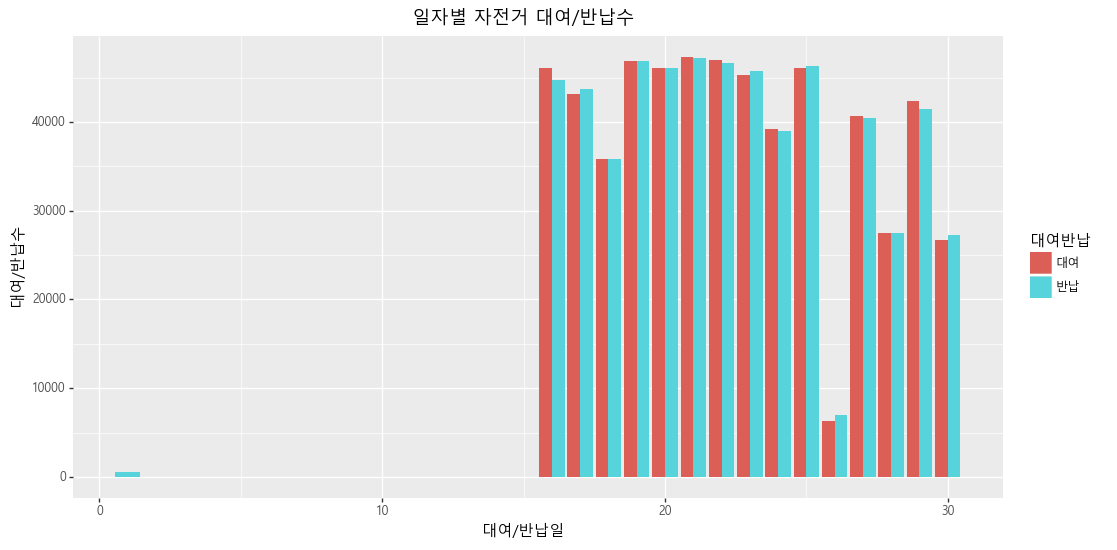

<ggplot: (-9223371943802162972)>

In [32]:
(ggplot(df_day)
 + aes(x = 'day', y = 'count', fill = '대여반납')
 + geom_bar(stat='identity', position='dodge')
#  + coord_flip()
 + theme(text = element_text(family = fontprop), figure_size = (12, 6))
 + labs(x = '대여/반납일', y = '대여/반납수', title = '일자별 자전거 대여/반납수')
)

In [33]:
# 년/월/일/시/분/요일 칼럼을 새로 생성
# dt = data time

df['반납년'] = df['반납일시'].dt.year
df['반납월'] = df['반납일시'].dt.month
df['반납일'] = df['반납일시'].dt.day
df['반납시'] = df['반납일시'].dt.hour
df['반납분'] = df['반납일시'].dt.minute
df['반납요일'] = df['반납일시'].dt.dayofweek
df.columns

Index(['자전거번호', '대여일시', '대여대여소번호', '대여대여소명', '대여거치대', '반납일시', '반납대여소번호',
       '반납대여소명', '반납거치대', '이용시간(분)', '이용거리(M)', '대여년', '대여월', '대여일', '대여시',
       '대여분', '대여요일', '반납년', '반납월', '반납일', '반납시', '반납분', '반납요일'],
      dtype='object')

In [34]:
# 1. 대여요일별 건수 새기
df_day_11 = df['대여요일'].value_counts().reset_index()

# column 이름 정하기
df_day_11.columns = ['dayofweek', 'count']
df_day_11 = df_day_11.sort_values('dayofweek')
# default는 오름차순

# 만들고 싶은 column 만들고 거따가 집어넣을 값 정하기
df_day_11['대여반납'] = '대여'
print(df_day_11.shape)
df_day_11.head()

(7, 3)


,dayofweek,count,대여반납
4,0,81933,대여
6,1,53151,대여
2,2,86805,대여
5,3,74772,대여
1,4,89337,대여


In [35]:
# 2. 반납요일별 건수 새기
df_day_22 = df['반납요일'].value_counts().reset_index()

# column 이름 정하기
df_day_22.columns = ['dayofweek', 'count']
df_day_22 = df_day_22.sort_values('dayofweek')

# 만들고 싶은 column 만들고 거따가 집어넣을 값 정하기
df_day_22['대여반납'] = '반납'
print(df_day_22.shape)
df_day_22.head()

(7, 3)


,dayofweek,count,대여반납
4,0,82058,반납
6,1,53907,반납
2,2,86535,반납
5,3,74772,반납
1,4,88168,반납


In [36]:
# concat() 함수 사용
df_dayofweek = pd.concat([df_day_11, df_day_22])

print(df_dayofweek.shape)
df_dayofweek.head()

(14, 3)


,dayofweek,count,대여반납
4,0,81933,대여
6,1,53151,대여
2,2,86805,대여
5,3,74772,대여
1,4,89337,대여


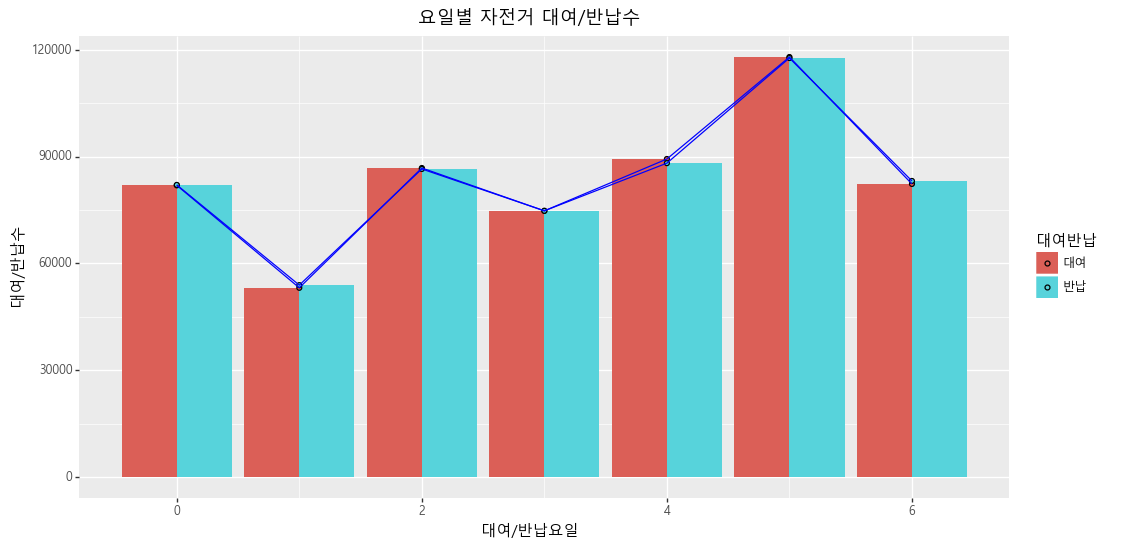

<ggplot: (-9223371943784218799)>

In [37]:
# ggplot으로 그래프를 그린다

(ggplot(df_dayofweek)
 + aes(x = 'dayofweek', y = 'count', fill = '대여반납')
 + geom_bar(stat='identity', position='dodge')
 + geom_point()
 + geom_line(color='blue')
#   + coord_flip()
 + theme(text = element_text(family = fontprop), figure_size = (12, 6))
 + labs(x = '대여/반납요일', y = '대여/반납수', title = '요일별 자전거 대여/반납수')
)

In [38]:
# 3. 대여시별 건수 새기
df_day_3 = df['대여시'].value_counts().reset_index()

# column 이름 정하기
df_day_3.columns = ['hour', 'count']
df_day_3 = df_day_3.sort_values('hour')

# 만들고 싶은 column 만들고 거따가 집어넣을 값 정하기
df_day_3['대여반납'] = '대여'
print(df_day_3.shape)
df_day_3.head()

(24, 3)


,hour,count,대여반납
13,0,19837,대여
17,1,15358,대여
19,2,12255,대여
21,3,7462,대여
23,4,4392,대여


In [39]:
# 2. 반납시별 건수 새기
df_day_4 = df['반납시'].value_counts().reset_index()

# column 이름 정하기
df_day_4.columns = ['hour', 'count']
df_day_4 = df_day_4.sort_values('hour')

# 만들고 싶은 column 만들고 거따가 집어넣을 값 정하기
df_day_4['대여반납'] = '반납'
print(df_day_4.shape)
df_day_4.head()

(24, 3)


,hour,count,대여반납
9,0,23434,반납
15,1,17709,반납
19,2,13973,반납
20,3,9213,반납
22,4,5734,반납


In [40]:
# concat() 함수 사용
df_hour = pd.concat([df_day_3, df_day_4])

print(df_hour.shape)
df_hour.head()

(48, 3)


,hour,count,대여반납
13,0,19837,대여
17,1,15358,대여
19,2,12255,대여
21,3,7462,대여
23,4,4392,대여


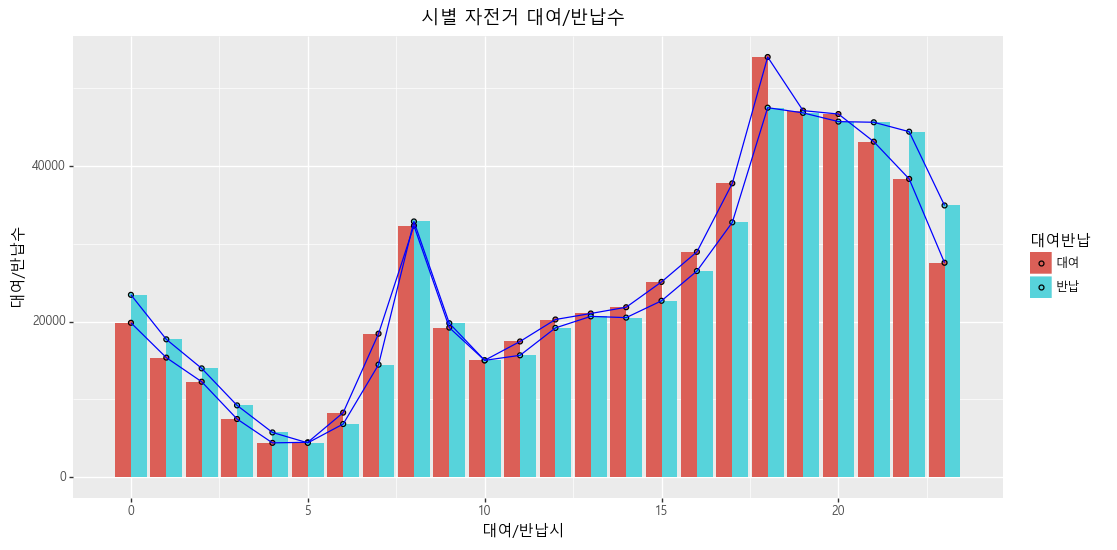

<ggplot: (-9223371943784221538)>

In [41]:
(ggplot(df_hour)
 + aes(x = 'hour', y = 'count', fill = '대여반납')
 + geom_bar(stat='identity', position='dodge')
 + geom_point()
 + geom_line(color='blue')
#   + coord_flip()
 + theme(text = element_text(family = fontprop), figure_size = (12, 6))
 + labs(x = '대여/반납시', y = '대여/반납수', title = '시별 자전거 대여/반납수')
)

## 대여와 반납이 같은 곳에서 이루어지고 있는지 확인

In [42]:
df.columns

Index(['자전거번호', '대여일시', '대여대여소번호', '대여대여소명', '대여거치대', '반납일시', '반납대여소번호',
       '반납대여소명', '반납거치대', '이용시간(분)', '이용거리(M)', '대여년', '대여월', '대여일', '대여시',
       '대여분', '대여요일', '반납년', '반납월', '반납일', '반납시', '반납분', '반납요일'],
      dtype='object')

In [43]:
# '같은 대여반납소'라는 새로운 column 생성
# 대여, 반납이 같은 곳에서 이루어지는지 여부 (boolean)

df['같은대여반납소'] = (df['대여대여소명'] == df['반납대여소명'])

In [44]:
df['같은대여반납소'].value_counts().reset_index()

,index,같은대여반납소
0,False,520100
1,True,66204


In [45]:
df_loc_diff = df['같은대여반납소'].value_counts().reset_index()
df_loc_diff.columns = ['일치여부', '대여반납수']
df_loc_diff

,일치여부,대여반납수
0,False,520100
1,True,66204


In [46]:
loc_diff_ratio = df_loc_diff['대여반납수'][0] / df_loc_diff['대여반납수'][1]
loc_diff_ratio
print('다른 곳에서 대여반납이 {:.2f}배 많다'.format(loc_diff_ratio))
# .2f : float를 뜻한다 소수점 2째자리까지 소수점 출력해라!

다른 곳에서 대여반납이 7.86배 많다


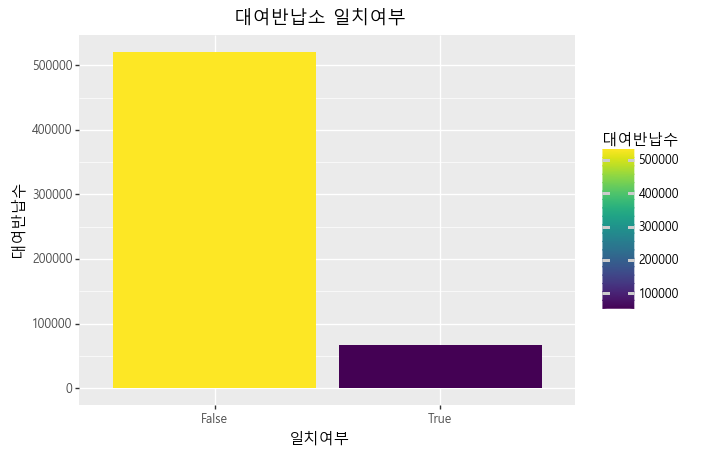

<ggplot: (93073327059)>

In [47]:
(ggplot(df_loc_diff)
 + geom_col(mapping = aes(x = '일치여부', y = '대여반납수', fill = '대여반납수'))
 + theme(text = element_text(family = fontprop))
 + labs(title = '대여반납소 일치여부')
)